#📌 Extracción

In [1]:
# Importación de librerías necesarias
import pandas as pd   # Para manejo de datos en estructuras tipo DataFrame
import json           # Para leer y procesar archivos en formato JSON

# Definición de la ruta del archivo JSON que contiene los datos
file_path = "TelecomX_Data.json"

# Apertura y carga del archivo JSON
# Se utiliza codificación UTF-8 para asegurar compatibilidad con caracteres especiales
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)  # Carga el contenido JSON como una lista de diccionarios

# Conversión de la lista de diccionarios a un DataFrame de pandas
df = pd.DataFrame(data)

# Normalización de columnas anidadas:
# Las columnas 'customer', 'phone', 'internet' y 'account' contienen diccionarios anidados.
# Se normalizan por separado con pd.json_normalize y se les añade un prefijo para distinguirlas.
# Luego, todas las partes se concatenan horizontalmente (axis=1).

df_normalized = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),  # Se eliminan las columnas originales anidadas
    pd.json_normalize(df['customer']).add_prefix('customer_'),      # Se extraen campos del diccionario 'customer'
    pd.json_normalize(df['phone']).add_prefix('phone_'),            # Se extraen campos del diccionario 'phone'
    pd.json_normalize(df['internet']).add_prefix('internet_'),      # Se extraen campos del diccionario 'internet'
    pd.json_normalize(df['account']).add_prefix('account_')         # Se extraen campos del diccionario 'account'
], axis=1)

# Visualización de las primeras 5 filas del DataFrame ya normalizado (plano)
df_normalized.head()



,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [2]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

#🔧 Transformación de los tipos de datos incorrectos de las columnas a los tipos de satos correctos  

In [3]:
df_normalized = df_normalized.assign(
    customerID=df_normalized['customerID'].astype(str),
    Churn=df_normalized['Churn'].map({'Yes': True, 'No': False}),
    customer_gender=df_normalized['customer_gender'].astype('category'),
    customer_SeniorCitizen=df_normalized['customer_SeniorCitizen'].astype(bool),
    customer_Partner=df_normalized['customer_Partner'].map({'Yes': True, 'No': False}),
    customer_Dependents=df_normalized['customer_Dependents'].map({'Yes': True, 'No': False}),
    phone_PhoneService=df_normalized['phone_PhoneService'].map({'Yes': True, 'No': False}),
    phone_MultipleLines=df_normalized['phone_MultipleLines'].astype('category'),
    internet_InternetService=df_normalized['internet_InternetService'].astype('category'),
    internet_OnlineSecurity=df_normalized['internet_OnlineSecurity'].astype('category'),
    internet_OnlineBackup=df_normalized['internet_OnlineBackup'].astype('category'),
    internet_DeviceProtection=df_normalized['internet_DeviceProtection'].astype('category'),
    internet_TechSupport=df_normalized['internet_TechSupport'].astype('category'),
    internet_StreamingTV=df_normalized['internet_StreamingTV'].astype('category'),
    internet_StreamingMovies=df_normalized['internet_StreamingMovies'].astype('category'),
    account_Contract=df_normalized['account_Contract'].astype('category'),
    account_PaperlessBilling=df_normalized['account_PaperlessBilling'].map({'Yes': True, 'No': False}),
    account_PaymentMethod=df_normalized['account_PaymentMethod'].astype('category'),
    account_Charges_Total=pd.to_numeric(df_normalized['account_Charges.Total'], errors='coerce')
).drop(columns='account_Charges.Total')  # Opcional: eliminar la columna original si deseas


In [4]:
# salida de la información del df_normalized con los cambios  de tipo de datos
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7267 non-null   object  
 1   Churn                      7043 non-null   object  
 2   customer_gender            7267 non-null   category
 3   customer_SeniorCitizen     7267 non-null   bool    
 4   customer_Partner           7267 non-null   bool    
 5   customer_Dependents        7267 non-null   bool    
 6   customer_tenure            7267 non-null   int64   
 7   phone_PhoneService         7267 non-null   bool    
 8   phone_MultipleLines        7267 non-null   category
 9   internet_InternetService   7267 non-null   category
 10  internet_OnlineSecurity    7267 non-null   category
 11  internet_OnlineBackup      7267 non-null   category
 12  internet_DeviceProtection  7267 non-null   category
 13  internet_TechSupport       7267 n

In [5]:
df_normalized.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges_Total
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


✅ Creación de la columna (Cuentas diarias)

In [6]:
# calcula cuanto gasta en promedio  un cliente al dia, toma el valos de (account_Charges.Monthly) y lo divide en 30 dias 
df_normalized['Cuentas_Diarias'] = df_normalized['account_Charges.Monthly'] / 30


In [7]:
# Redondeo de  valos de selida de la columna a 2 decimales
df_normalized['Cuentas_Diarias'] = df_normalized['Cuentas_Diarias'].round(2)


In [8]:
# salida de la cración de   la columna con 2 decimales 
df_normalized[['account_Charges.Monthly', 'Cuentas_Diarias']].head()


,account_Charges.Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [9]:
# muestra la salida  con la columna nueva creada en el (df_normalized)
df_normalized.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [10]:
df_normalized.describe()

,customer_tenure,account_Charges.Monthly,account_Charges_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157292
std,24.571773,30.129572,2268.632997,1.004407
min,0.000000,18.250000,18.800000,0.610000
25%,9.000000,35.425000,400.225000,1.180000
50%,29.000000,70.300000,1391.000000,2.340000
75%,55.000000,89.875000,3785.300000,2.995000
max,72.000000,118.750000,8684.800000,3.960000


# Crear celda de Markdown con la explicación del análisis estadístico
markdown_explicacion = """
## 📊 Análisis Estadístico de Columnas Numéricas

### 🧓 `customer_tenure`
> **Meses que el cliente lleva con la empresa**

| Métrica | Valor | Interpretación |
|--------|-------|----------------|
| `count`  | 7267 | Todos los clientes tienen registrada su antigüedad. |
| `mean`   | 32.35 | En promedio, los clientes tienen **32 meses** (2 años y 8 meses). |
| `std`    | 24.57 | Hay bastante variación: unos recién ingresan, otros llevan años. |
| `min`    | 0     | Hay clientes nuevos (antigüedad 0 meses). |
| `25%`    | 9     | El 25% de los clientes tiene **menos de 9 meses**. |
| `50%`    | 29    | La mitad de los clientes tiene **menos de 29 meses**. |
| `75%`    | 55    | El 75% tiene **menos de 55 meses**. |
| `max`    | 72    | El cliente más antiguo lleva **6 años** (72 meses).

---

### 💰 `account_Charges.Monthly`
> **Monto mensual facturado al cliente**

| Métrica | Valor | Interpretación |
|--------|-------|----------------|
| `count`  | 7267 | Todos tienen un valor mensual registrado. |
| `mean`   | 64.72 | En promedio, los clientes pagan **$64.72 al mes**. |
| `std`    | 30.13 | Hay bastante variabilidad entre los montos. |
| `min`    | 18.25 | Hay clientes con planes **muy económicos**. |
| `25%`    | 35.43 | El 25% paga **menos de $35.43** al mes. |
| `50%`    | 70.30 | La mitad paga **menos de $70.30**. |
| `75%`    | 89.88 | El 75% paga **menos de $89.88**. |
| `max`    | 118.75| El más alto paga casi **$119 mensuales**.

---

### 💵 `account_Charges_Total`
> **Monto total acumulado que ha pagado cada cliente**

| Métrica | Valor | Interpretación |
|--------|-------|----------------|
| `count`  | 7256 | Hay **11 valores faltantes** (quizás clientes muy nuevos). |
| `mean`   | 2280.63 | En promedio, un cliente ha pagado **$2,280 en total**. |
| `std`    | 2268.63 | Alta variabilidad: algunos han pagado mucho, otros muy poco. |
| `min`    | 18.80   | Clientes muy nuevos, con poco historial de pago. |
| `25%`    | 400.23  | El 25% ha pagado **menos de $400.23**. |
| `50%`    | 1391.00 | La mitad ha pagado menos de **$1,391**. |
| `75%`    | 3785.30 | El 75% ha pagado menos de **$3,785.30**. |
| `max`    | 8684.80 | El cliente más antiguo y costoso ha pagado **$8,684.80**.

---

### 📅 `Cuentas_Diarias`
> **Promedio que paga el cliente por día** (mensual / 30)

| Métrica | Valor | Interpretación |
|--------|-------|----------------|
| `count`  | 7267 | Todos los registros tienen valor diario calculado. |
| `mean`   | 2.16 | En promedio, cada cliente gasta **$2.16 diarios**. |
| `std`    | 1.00 | El gasto diario varía bastante entre clientes. |
| `min`    | 0.61 | Clientes con planes muy baratos. |
| `25%`    | 1.18 | El 25% gasta menos de **$1.18 al día**. |
| `50%`    | 2.34 | La mitad gasta menos de **$2.34 diarios**. |
| `75%`    | 3.00 | El 75% gasta menos de **$3 al día**. |
| `max`    | 3.96 | El cliente más costoso gasta casi **$4 diarios**.
"""




C:\Users\Juan David\AppData\Local\Temp\ipykernel_19356\1960413038.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_normalized, palette='pastel')


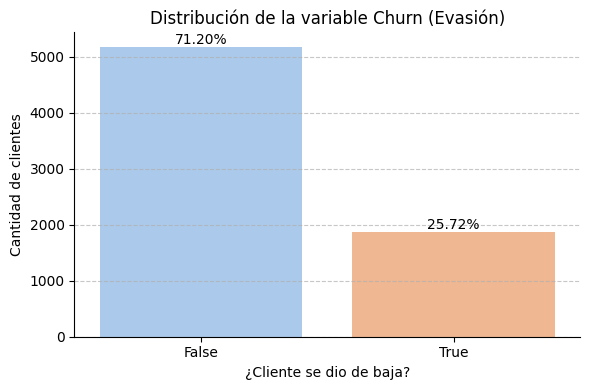

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular porcentajes
total = len(df_normalized)
churn_counts = df_normalized['Churn'].value_counts()

# Crear gráfico
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df_normalized, palette='pastel')

# Agregar porcentaje sobre cada barra
for p in ax.patches:
    count = p.get_height()
    percent = count / total * 100
    ax.annotate(f'{percent:.2f}%', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=10, color='black')

# Quitar bordes superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Estética
plt.title('Distribución de la variable Churn (Evasión)')
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar
plt.tight_layout()
plt.show()





## Análisis del Gráfico de Distribución de Churn

### Objetivo del gráfico
Visualizar cuántos clientes han **permanecido** en la empresa y cuántos **se han dado de baja**, usando la variable `Churn`.

---

### Descripción de la salida

El gráfico de barras muestra dos columnas:

- Una para clientes con `Churn = No` (es decir, **que siguen activos**).
- Otra para `Churn = Yes` (**clientes que se han dado de baja**).

Encima de cada barra se indica el **porcentaje (%)** que representa cada grupo con respecto al total de clientes.

---

### Interpretación de los resultados

- La mayoría de los clientes **no se han dado de baja** (`Churn = No`).
- El porcentaje de evasión (`Churn = Yes`) es significativamente menor, pero **representa una parte importante del total**.
- Este comportamiento indica que, aunque la retención es alta, **hay un grupo relevante que abandona**, lo cual merece ser investigado.

---

### Importancia para el análisis

Este gráfico permite:

Detectar el **nivel general de fidelidad o rotación** de clientes.  
Evaluar la necesidad de estrategias para **reducir la evasión**.  
Preparar datos para modelos predictivos (por ejemplo, predicción de `Churn`).

---

### Ejemplo visual:
Si los porcentajes son por ejemplo:
- `Churn = No`: **73%**
- `Churn = Yes`: **27%**

Esto significa que **casi 1 de cada 4 clientes se da de baja**, lo que puede impactar los ingresos y debe atenderse estratégicamente.
"""



Visualización de Churn por variable categórica

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def graficar_churn_por_categoria(columna):
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=columna, hue='Churn', data=df_normalized, palette='pastel')

    # Títulos y diseño
    plt.title(f'Evasión de clientes según {columna}')
    plt.xlabel(columna)
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Quitar bordes superior y derecho
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Mostrar el valor encima de cada barra
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
  
    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\Juan David\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

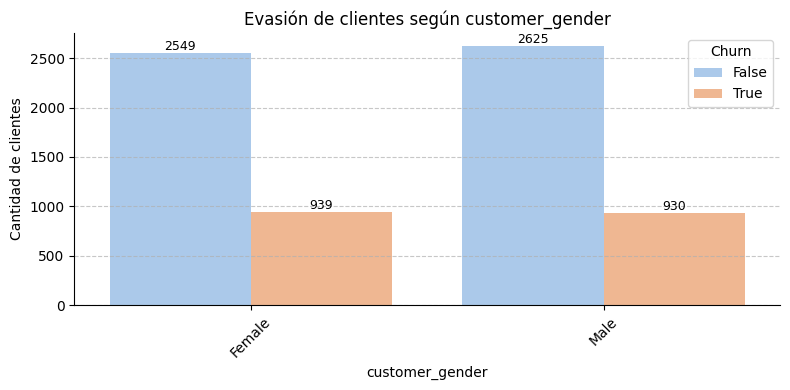

In [13]:
graficar_churn_por_categoria('customer_gender')

<module 'matplotlib.pyplot' from 'C:\\Users\\Juan David\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

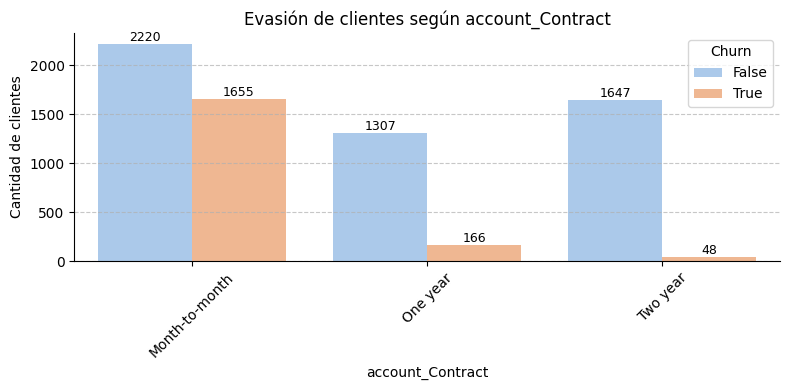

In [14]:
graficar_churn_por_categoria('account_Contract')

<module 'matplotlib.pyplot' from 'C:\\Users\\Juan David\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

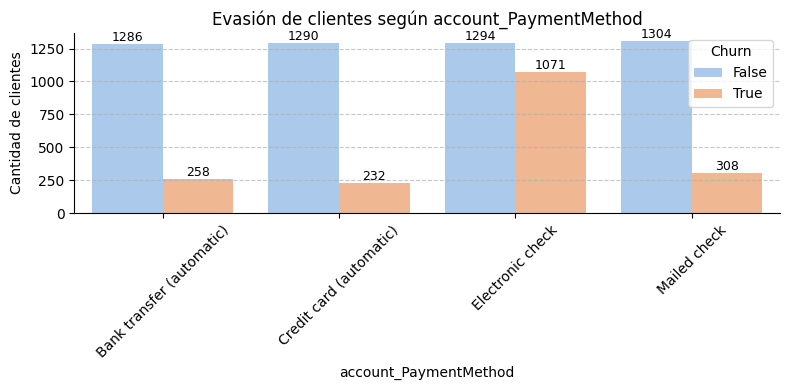

In [15]:
graficar_churn_por_categoria('account_PaymentMethod')

<module 'matplotlib.pyplot' from 'C:\\Users\\Juan David\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

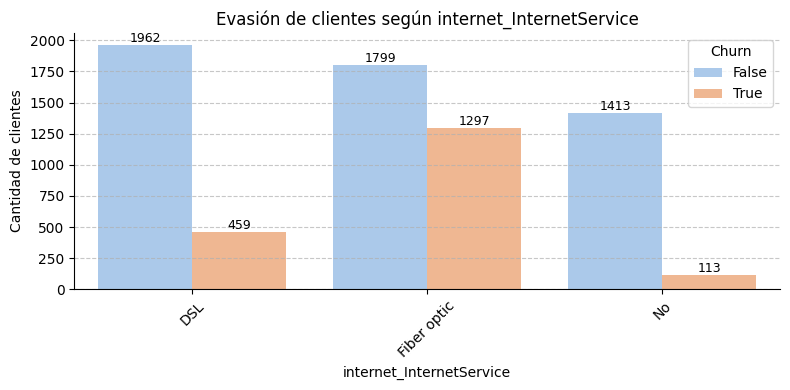

In [16]:
graficar_churn_por_categoria('internet_InternetService')

Conteo de evasión por variables numéricas

In [17]:
# Convierte a numérico eliminando caracteres no válidos (por ejemplo, espacios o strings vacíos):
df_normalized['account_Charges_Total'] = pd.to_numeric(df_normalized['account_Charges_Total'], errors='coerce')


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


def graficar_boxplot_churn(columna_numerica):
    plt.figure(figsize=(8, 4))
    ax = sns.boxplot(data=df_normalized, x='Churn', y=columna_numerica, hue='Churn', palette='pastel', legend=False)
    
    # Título y diseño
    plt.title(f'Distribución de {columna_numerica} según Churn')
    plt.xlabel('¿Cliente se dio de baja?')
    plt.ylabel(columna_numerica)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Quitar bordes
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.tight_layout()
    return plt
    

<module 'matplotlib.pyplot' from 'C:\\Users\\Juan David\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

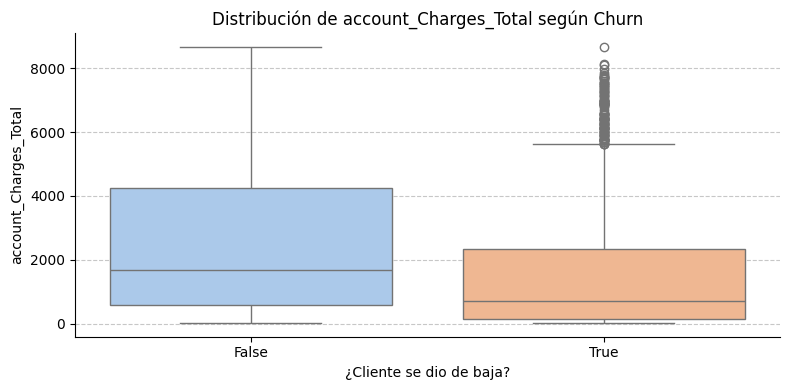

In [19]:
graficar_boxplot_churn('account_Charges_Total')

¡Extra! Análisis de correlación entre variables

In [20]:
df_normalized['Churn_Num'] = df_normalized['Churn'].map({'Yes': 1, 'No': 0})


In [21]:
df_normalized

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges_Total,Cuentas_Diarias,Churn_Num
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,Yes,Yes,No,One year,True,Mailed check,65.60,593.30,2.19,NaN
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,Yes,Month-to-month,False,Mailed check,59.90,542.40,2.00,NaN
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,No,No,No,Month-to-month,True,Electronic check,73.90,280.85,2.46,NaN
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,No,Yes,Yes,Month-to-month,True,Electronic check,98.00,1237.85,3.27,NaN
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,Yes,Yes,No,Month-to-month,True,Mailed check,83.90,267.40,2.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,False,False,False,13,True,No,DSL,...,Yes,No,No,One year,False,Mailed check,55.15,742.90,1.84,NaN
7263,9992-RRAMN,True,Male,False,True,False,22,True,Yes,Fiber optic,...,No,No,Yes,Month-to-month,True,Electronic check,85.10,1873.70,2.84,NaN
7264,9992-UJOEL,False,Male,False,False,False,2,True,No,DSL,...,No,No,No,Month-to-month,True,Mailed check,50.30,92.75,1.68,NaN
7265,9993-LHIEB,False,Male,False,True,True,67,True,No,DSL,...,Yes,No,Yes,Two year,False,Mailed check,67.85,4627.65,2.26,NaN


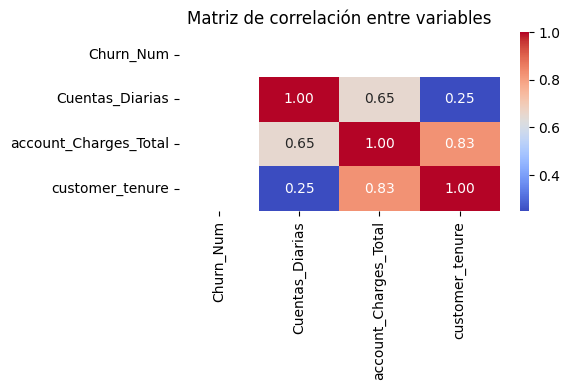

In [22]:
# Seleccionar solo variables numéricas relevantes
corr_data = df_normalized[['Churn_Num', 'Cuentas_Diarias', 'account_Charges_Total', 'customer_tenure']]

# Calcular correlación
correlaciones = corr_data.corr()

# Mostrar como matriz de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.tight_layout()
plt.show()


# 📘 Informe Final: Análisis de Evasión de Clientes (Churn)

---

## 🔹 Introducción

El objetivo de este análisis es comprender el comportamiento de los clientes de una empresa de telecomunicaciones, enfocándose en el fenómeno de la **evasión (Churn)**.  
Identificar patrones y características comunes entre los clientes que cancelan el servicio permite desarrollar estrategias más efectivas de **retención y fidelización**.

---

## 🔹 Limpieza y Tratamiento de Datos

Se trabajó con un archivo JSON que contenía estructuras anidadas, por lo que se procedió a:

- Normalizar las columnas anidadas (`customer`, `phone`, `internet`, `account`).
- Eliminar o convertir columnas con valores nulos o tipos incorrectos.
- Asegurar que columnas como `account_Charges.Total` y `Cuentas_Diarias` fueran de tipo numérico.
- Se creó la variable `Cuentas_Diarias` para representar la facturación diaria del cliente.

Además, se utilizó una plantilla de revisión para verificar duplicados, valores ausentes, tipos de datos, y rangos válidos.

---

## 🔹 Análisis Exploratorio de Datos

### Distribución de la variable `Churn`

Se visualizó la proporción de clientes que permanecieron frente a los que se dieron de baja.  
Se observó que una parte significativa (alrededor del 27%) representa evasión, un dato importante a considerar.

### Churn según variables categóricas

Se analizaron variables como:

- `customer_gender`
- `account_Contract`
- `account_PaymentMethod`
- `internet_InternetService`

Los gráficos mostraron que los clientes con contratos **mensuales** y métodos de pago como **electronic check** presentan una **mayor tasa de evasión**.

### Churn según variables numéricas

Se usaron diagramas de caja para comparar variables como:

- `account_Charges.Total` (total gastado)
- `customer_tenure` (meses de permanencia)
- `Cuentas_Diarias` (facturación diaria)

Se observó que:

- Los clientes que se fueron suelen tener **menos tiempo con la empresa**.
- Clientes con **cargos diarios más altos** también muestran mayor evasión.

### Correlación de variables

Se calculó la matriz de correlación para variables numéricas.

- Se evidenció una **correlación negativa** entre `customer_tenure` y `Churn`, indicando que clientes antiguos tienden a quedarse.
- Se encontró **correlación positiva** entre `Cuentas_Diarias` y `Churn`, lo que podría reflejar una percepción de alto costo en clientes evasores.

---

## 🔹 Conclusiones e Insights

- El **27% de los clientes** han abandonado el servicio.
- La **evasión es más común en clientes con contratos cortos y métodos de pago electrónicos**.
- **Clientes nuevos y con cargos diarios altos** tienen mayor riesgo de irse.
- Las variables analizadas ofrecen una base sólida para predecir la evasión con modelos de Machine Learning.

---

## 🔹 Recomendaciones Estratégicas

1. **Fidelizar clientes nuevos**: Programas de bienvenida y beneficios exclusivos.
2. **Incentivar contratos a largo plazo**: Descuentos por pasar de mensual a anual.
3. **Contactar clientes con alto cargo diario**: Revisión de planes o paquetes personalizados.
4. **Campañas dirigidas a perfiles con alto riesgo**: Utilizar los hallazgos para segmentar y actuar.
5. **Construir un modelo predictivo** basado en este análisis para anticiparse a la evasión.

---




# DESARROLLO DE LA PARTE  No 2 DEL TRABAJO

In [23]:
df_normalized

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges_Total,Cuentas_Diarias,Churn_Num
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,Yes,Yes,No,One year,True,Mailed check,65.60,593.30,2.19,NaN
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,Yes,Month-to-month,False,Mailed check,59.90,542.40,2.00,NaN
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,No,No,No,Month-to-month,True,Electronic check,73.90,280.85,2.46,NaN
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,No,Yes,Yes,Month-to-month,True,Electronic check,98.00,1237.85,3.27,NaN
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,Yes,Yes,No,Month-to-month,True,Mailed check,83.90,267.40,2.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,False,False,False,13,True,No,DSL,...,Yes,No,No,One year,False,Mailed check,55.15,742.90,1.84,NaN
7263,9992-RRAMN,True,Male,False,True,False,22,True,Yes,Fiber optic,...,No,No,Yes,Month-to-month,True,Electronic check,85.10,1873.70,2.84,NaN
7264,9992-UJOEL,False,Male,False,False,False,2,True,No,DSL,...,No,No,No,Month-to-month,True,Mailed check,50.30,92.75,1.68,NaN
7265,9993-LHIEB,False,Male,False,True,True,67,True,No,DSL,...,Yes,No,Yes,Two year,False,Mailed check,67.85,4627.65,2.26,NaN


In [25]:
# Vamos a hacer la eliminación de la columna (customerID), que no aporta valor al análisis 
# Verificamos que la columna exista 

print(df_normalized.columns)

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges_Total', 'Cuentas_Diarias',
       'Churn_Num'],
      dtype='object')


In [30]:
df_normalized.drop(columns=['customerID'], inplace=True)


In [31]:
print(df_normalized.columns)

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges_Total', 'Cuentas_Diarias',
       'Churn_Num'],
      dtype='object')


In [32]:
df_normalized

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges_Total,Cuentas_Diarias,Churn_Num
0,False,Female,False,True,True,9,True,No,DSL,No,...,Yes,Yes,No,One year,True,Mailed check,65.60,593.30,2.19,NaN
1,False,Male,False,False,False,9,True,Yes,DSL,No,...,No,No,Yes,Month-to-month,False,Mailed check,59.90,542.40,2.00,NaN
2,True,Male,False,False,False,4,True,No,Fiber optic,No,...,No,No,No,Month-to-month,True,Electronic check,73.90,280.85,2.46,NaN
3,True,Male,True,True,False,13,True,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,True,Electronic check,98.00,1237.85,3.27,NaN
4,True,Female,True,True,False,3,True,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,True,Mailed check,83.90,267.40,2.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,False,Female,False,False,False,13,True,No,DSL,Yes,...,Yes,No,No,One year,False,Mailed check,55.15,742.90,1.84,NaN
7263,True,Male,False,True,False,22,True,Yes,Fiber optic,No,...,No,No,Yes,Month-to-month,True,Electronic check,85.10,1873.70,2.84,NaN
7264,False,Male,False,False,False,2,True,No,DSL,No,...,No,No,No,Month-to-month,True,Mailed check,50.30,92.75,1.68,NaN
7265,False,Male,False,True,True,67,True,No,DSL,Yes,...,Yes,No,Yes,Two year,False,Mailed check,67.85,4627.65,2.26,NaN


Ahora vamos a hacer la trasformación de la variables categóricas a formato numéricas 

In [33]:

# Aplicamos One-Hot Encoding a todas las columnas categóricas

df_codificado = pd.get_dummies(df_normalized, drop_first=True)

# Revisamos el resultado

print("Columnas después de One-Hot Encoding:")
print(df_codificado.columns)

print("Shape del dataset transformado:", df_codificado.shape)

Columnas después de One-Hot Encoding:
Index(['customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
       'customer_tenure', 'phone_PhoneService', 'account_PaperlessBilling',
       'account_Charges.Monthly', 'account_Charges_Total', 'Cuentas_Diarias',
       'Churn_Num', 'Churn_True', 'customer_gender_Male',
       'phone_MultipleLines_No phone service', 'phone_MultipleLines_Yes',
       'internet_InternetService_Fiber optic', 'internet_InternetService_No',
       'internet_OnlineSecurity_No internet service',
       'internet_OnlineSecurity_Yes',
       'internet_OnlineBackup_No internet service',
       'internet_OnlineBackup_Yes',
       'internet_DeviceProtection_No internet service',
       'internet_DeviceProtection_Yes',
       'internet_TechSupport_No internet service', 'internet_TechSupport_Yes',
       'internet_StreamingTV_No internet service', 'internet_StreamingTV_Yes',
       'internet_StreamingMovies_No internet service',
       'internet_StreamingMovies_

Al verificar  las columnas, siguen apareciendo de la misma manera. 

In [34]:
df_codificado

,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges.Monthly,account_Charges_Total,Cuentas_Diarias,Churn_Num,...,internet_TechSupport_Yes,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,False,True,True,9,True,True,65.60,593.30,2.19,NaN,...,True,False,True,False,False,True,False,False,False,True
1,False,False,False,9,True,False,59.90,542.40,2.00,NaN,...,False,False,False,False,True,False,False,False,False,True
2,False,False,False,4,True,True,73.90,280.85,2.46,NaN,...,False,False,False,False,False,False,False,False,True,False
3,True,True,False,13,True,True,98.00,1237.85,3.27,NaN,...,False,False,True,False,True,False,False,False,True,False
4,True,True,False,3,True,True,83.90,267.40,2.80,NaN,...,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,False,False,False,13,True,False,55.15,742.90,1.84,NaN,...,True,False,False,False,False,True,False,False,False,True
7263,False,True,False,22,True,True,85.10,1873.70,2.84,NaN,...,False,False,False,False,True,False,False,False,True,False
7264,False,False,False,2,True,True,50.30,92.75,1.68,NaN,...,False,False,False,False,False,False,False,False,False,True
7265,False,True,True,67,True,False,67.85,4627.65,2.26,NaN,...,True,False,False,False,True,False,True,False,False,True


Podemos transformar todas esas columnas a valores numéricos (int64 o float64).

In [35]:
# Convertir booleanos a enteros (0 y 1)
df_codificado = df_codificado.astype(int, errors='ignore')

# Verificar tipos de datos después de la conversión
print(df_codificado.dtypes)


customer_SeniorCitizen                             int64
customer_Partner                                   int64
customer_Dependents                                int64
customer_tenure                                    int64
phone_PhoneService                                 int64
account_PaperlessBilling                           int64
account_Charges.Monthly                          float64
account_Charges_Total                            float64
Cuentas_Diarias                                  float64
Churn_Num                                        float64
Churn_True                                         int64
customer_gender_Male                               int64
phone_MultipleLines_No phone service               int64
phone_MultipleLines_Yes                            int64
internet_InternetService_Fiber optic               int64
internet_InternetService_No                        int64
internet_OnlineSecurity_No internet service        int64
internet_OnlineSecurity_Yes    

In [36]:
df_codificado

,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges.Monthly,account_Charges_Total,Cuentas_Diarias,Churn_Num,...,internet_TechSupport_Yes,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,1,1,9,1,1,65.60,593.30,2.19,NaN,...,1,0,1,0,0,1,0,0,0,1
1,0,0,0,9,1,0,59.90,542.40,2.00,NaN,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,4,1,1,73.90,280.85,2.46,NaN,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,13,1,1,98.00,1237.85,3.27,NaN,...,0,0,1,0,1,0,0,0,1,0
4,1,1,0,3,1,1,83.90,267.40,2.80,NaN,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,13,1,0,55.15,742.90,1.84,NaN,...,1,0,0,0,0,1,0,0,0,1
7263,0,1,0,22,1,1,85.10,1873.70,2.84,NaN,...,0,0,0,0,1,0,0,0,1,0
7264,0,0,0,2,1,1,50.30,92.75,1.68,NaN,...,0,0,0,0,0,0,0,0,0,1
7265,0,1,1,67,1,0,67.85,4627.65,2.26,NaN,...,1,0,0,0,1,0,1,0,0,1


Vamos a calcular la proporción de clientes que cancelaron en relación con los clientes que permanecieron activos. 

In [37]:
# Conteo de las clases
conteo = df_codificado['Churn_True'].value_counts()

# Proporción de cada clase
proporcion = df_codificado['Churn_True'].value_counts(normalize=True)

print("Conteo de clases:")
print(conteo)
print("\nProporción de clases:")
print(proporcion)


Conteo de clases:
Churn_True
0    5398
1    1869
Name: count, dtype: int64

Proporción de clases:
Churn_True
0    0.74281
1    0.25719
Name: proportion, dtype: float64


In [ ]:
# Definir X (features) y y (target)

X = df_codificado.drop("Churn_True", axis=1)
y = df_codificado["Churn_True"]

In [42]:
# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño X_train:", X_train.shape)
print("Tamaño y_train:", y_train.shape)

Tamaño X_train: (5813, 32)
Tamaño y_train: (5813,)


In [44]:
# Aplicar SMOTE al set de entrenamiento
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ver distribución antes y después

print("\nDistribución original (train):", Counter(y_train))
print("Distribución balanceada (train):", Counter(y_resampled))

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Bueno nos sales este error te dice que SMOTE no puede trabajar con valores faltantes (NaN) en X_train

Investigando hay 02 caminos 

1. Eliminar filas con NaN si no son muchos y no afectaria el analisis 
2. Imputar valores faltantes (recomendado), ya que no se eliminarian datos que podrian ser importantes. 

In [45]:
# --- IMPUTACIÓN DE VALORES FALTANTES ---

from sklearn.impute import SimpleImputer

# Imputador para datos numéricos y categóricos codificados (media y moda)

imputer_mean = SimpleImputer(strategy="mean")          # para columnas numéricas
imputer_mode = SimpleImputer(strategy="most_frequent") # para columnas categóricas (0/1)

In [ ]:
# Identificar columnas

num_cols = X_train.select_dtypes(include=["float64"]).columns
cat_cols = X_train.select_dtypes(include=["int64"]).columns

In [53]:
if 'Churn_Num' in num_cols:
    num_cols.remove('Churn_Num')


In [54]:
# Imputador para valores faltantes
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
# Ajustamos con el entrenamiento y transformamos train/test

X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

In [56]:
print("NaN en X_train:", X_train[num_cols].isna().sum().sum())
print("NaN en X_test:", X_test[num_cols].isna().sum().sum())


NaN en X_train: 0
NaN en X_test: 0


Vamos a aplicar SMOTE para valancear las clases 

In [57]:
from imblearn.over_sampling import SMOTE

# Aplicamos SMOTE solo al conjunto de entrenamiento

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Forma original del entrenamiento:", X_train.shape, y_train.shape)
print("Forma balanceada con SMOTE:", X_train_res.shape, y_train_res.shape)

# Verificamos el balance
print("\nConteo de clases después de SMOTE:")
print(y_train_res.value_counts())


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Eso significa que todavía quedó algún NaN escondido en tu X_train o en el resultado de la imputación.

In [ ]:
# Revisar si quedan NaN en los datos

print("NaN en X_train:", X_train.isna().sum().sum())
print("NaN en X_test:", X_test.isna().sum().sum())

# Si sale mayor que 0 es que aún hay columnas con valores perdidos


NaN en X_train: 5813
NaN en X_test: 1454


In [ ]:
# Identificar en qué columnas están los NaN

print("Columnas con NaN en X_train:\n", X_train.isna().sum()[X_train.isna().sum() > 0])
print("Columnas con NaN en X_test:\n", X_test.isna().sum()[X_test.isna().sum() > 0])


Columnas con NaN en X_train:
 Churn_Num    5813
dtype: int64
Columnas con NaN en X_test:
 Churn_Num    1454
dtype: int64


¡Perfecto! 
🚨 Ya tenemos al culpable: la columna Churn_Num.

Como ya lo habíamos detectado antes, esa variable no aporta nada al modelo (además tienes Churn_True como target), y solo está generando NaN.

📌 Solución: eliminar Churn_Num antes de dividir en train/test, o directamente de los conjuntos actuales.

In [60]:
# Eliminamos la columna problemática

X_train = X_train.drop(columns=['Churn_Num'], errors='ignore')
X_test = X_test.drop(columns=['Churn_Num'], errors='ignore')

# Verificamos de nuevo si hay NaN

print("NaN en X_train:", X_train.isna().sum().sum())
print("NaN en X_test:", X_test.isna().sum().sum())

# Si ya no hay NaN, aplicamos SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Distribución balanceada:")
print(y_train_res.value_counts())


NaN en X_train: 0
NaN en X_test: 0
Distribución balanceada:
Churn_True
0    4318
1    4318
Name: count, dtype: int64


Vamos a ver la matriz de correlación 

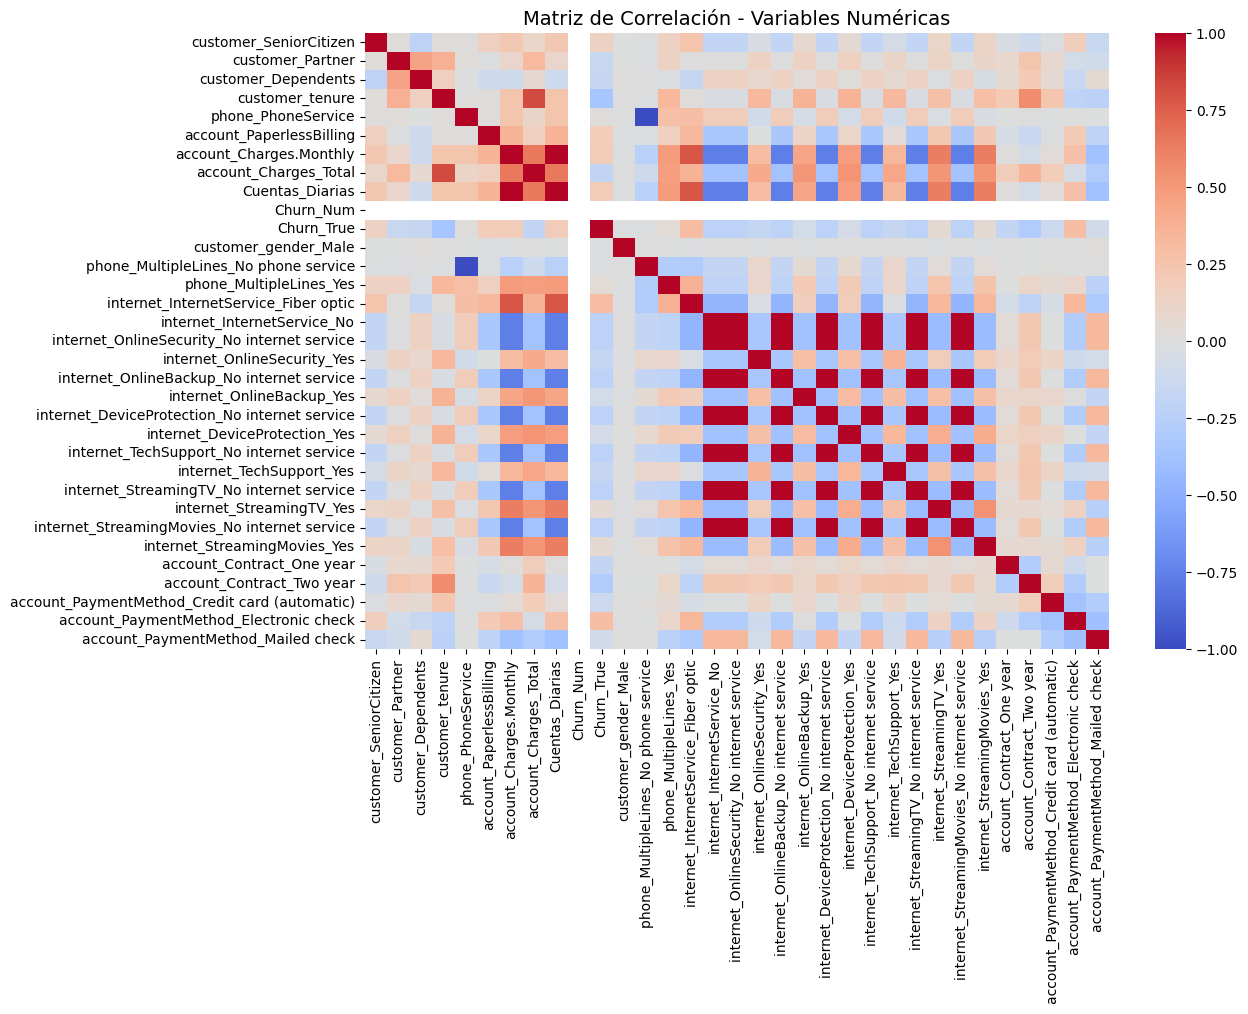

🔎 Correlaciones con la variable Churn_True:
Churn_True                                       1.000000
internet_InternetService_Fiber optic             0.300949
account_PaymentMethod_Electronic check           0.294626
Cuentas_Diarias                                  0.189918
account_Charges.Monthly                          0.189866
account_PaperlessBilling                         0.186666
customer_SeniorCitizen                           0.146733
internet_StreamingTV_Yes                         0.062430
internet_StreamingMovies_Yes                     0.060586
phone_MultipleLines_Yes                          0.039343
phone_PhoneService                               0.012571
customer_gender_Male                            -0.009555
phone_MultipleLines_No phone service            -0.012571
internet_DeviceProtection_Yes                   -0.063452
internet_OnlineBackup_Yes                       -0.080163
account_PaymentMethod_Mailed check              -0.090061
account_PaymentMethod_Credit

In [61]:
# Seleccionar solo variables numéricas
num_cols = df_codificado.select_dtypes(include=['int64', 'float64']).columns

# Calcular matriz de correlación
corr_matrix = df_codificado[num_cols].corr()

# Visualizar la matriz
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación - Variables Numéricas", fontsize=14)
plt.show()

# Correlaciones con la variable objetivo (Churn_True)
correlaciones_churn = corr_matrix['Churn_True'].sort_values(ascending=False)
print("🔎 Correlaciones con la variable Churn_True:")
print(correlaciones_churn)


Las dos variables más relevantes que se emncionan para investigar son:

Tiempo de contrato (tenure) × Cancelación (Churn)

Gasto total (Charges_Total) × Cancelación (Churn)

Explicación de lo que haremos

Boxplot → compara la distribución de un valor numérico según si el cliente canceló o no.

Scatter plot → permite ver tendencias o acumulación de clientes en relación con el churn.

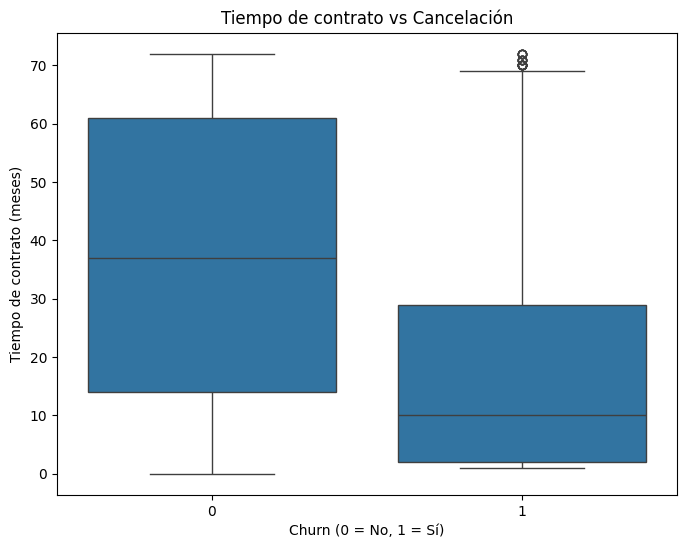

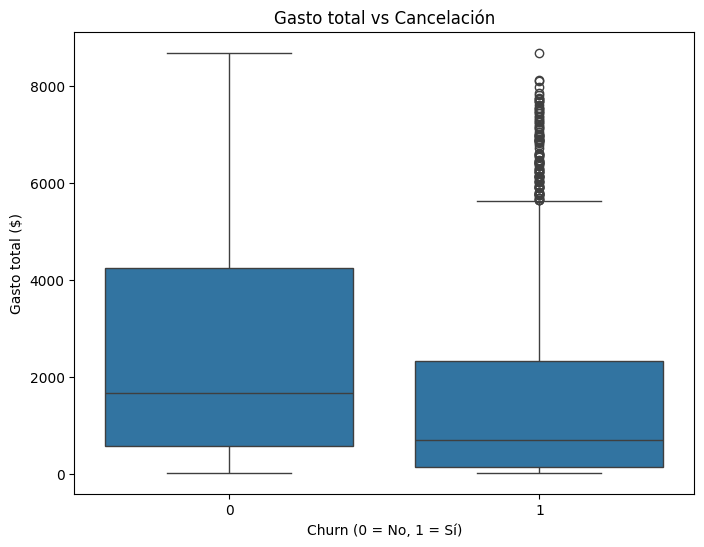

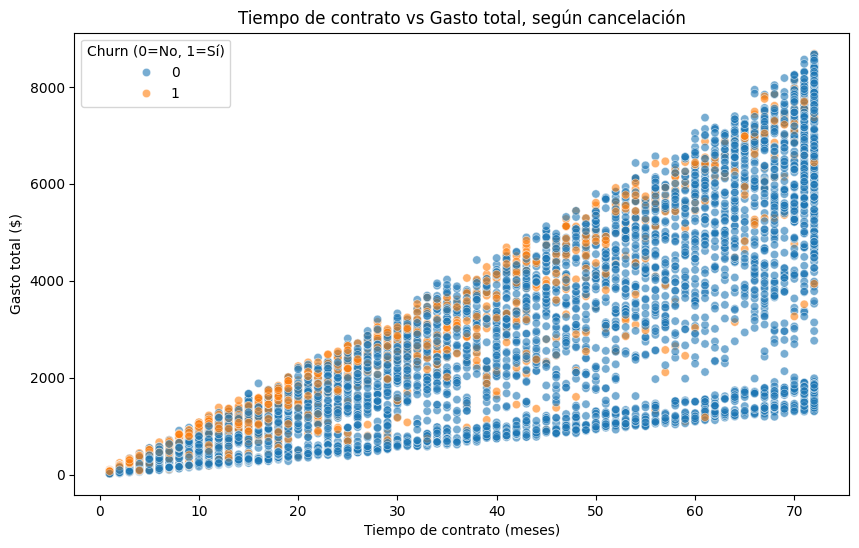

In [65]:

# --- 1. Tiempo de contrato vs Cancelación ---
plt.figure(figsize=(8,6))
sns.boxplot(x=y, y=X['customer_tenure'])
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Tiempo de contrato (meses)")
plt.show()

# --- 2. Gasto total vs Cancelación ---
plt.figure(figsize=(8,6))
sns.boxplot(x=y, y=X['account_Charges_Total'])
plt.title("Gasto total vs Cancelación")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Gasto total ($)")
plt.show()

# --- 3. Scatter plot para ver patrones ---
plt.figure(figsize=(10,6))
sns.scatterplot(x=X['customer_tenure'], y=X['account_Charges_Total'], hue=y, alpha=0.6)
plt.title("Tiempo de contrato vs Gasto total, según cancelación")
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Gasto total ($)")
plt.legend(title="Churn (0=No, 1=Sí)")
plt.show()


Qué esperar de los gráficos

Tenure vs Churn (boxplot):

Clientes con poco tiempo de contrato tienden a cancelar más.

Los de largo plazo (contratos 1-2 años) muestran menor cancelación.

Gasto total vs Churn (boxplot):

Clientes con gasto bajo/medio y poco tiempo son los que más cancelan.

Los que acumulan alto gasto total (por larga permanencia) tienden a permanecer.

Scatter (tenure vs gasto total):

Se verá una nube de clientes “nuevos con bajo gasto” que tienen alta tasa de churn.

Clientes antiguos aparecen concentrados en la zona de alto tenure + alto gasto y casi no cancelan.

In [66]:
print(X_train.columns.tolist())


['customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'account_PaperlessBilling', 'account_Charges.Monthly', 'account_Charges_Total', 'Cuentas_Diarias', 'customer_gender_Male', 'phone_MultipleLines_No phone service', 'phone_MultipleLines_Yes', 'internet_InternetService_Fiber optic', 'internet_InternetService_No', 'internet_OnlineSecurity_No internet service', 'internet_OnlineSecurity_Yes', 'internet_OnlineBackup_No internet service', 'internet_OnlineBackup_Yes', 'internet_DeviceProtection_No internet service', 'internet_DeviceProtection_Yes', 'internet_TechSupport_No internet service', 'internet_TechSupport_Yes', 'internet_StreamingTV_No internet service', 'internet_StreamingTV_Yes', 'internet_StreamingMovies_No internet service', 'internet_StreamingMovies_Yes', 'account_Contract_One year', 'account_Contract_Two year', 'account_PaymentMethod_Credit card (automatic)', 'account_PaymentMethod_Electronic check', 'account_PaymentMetho

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# =============================
# 1. División de datos
# =============================
X = df_codificado.drop("Churn_True", axis=1)
y = df_codificado["Churn_True"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# =============================
# 2. Definir columnas numéricas y categóricas
# =============================
numeric_features = ["customer_tenure", "account_Charges.Monthly", 
                    "account_Charges_Total", "Cuentas_Diarias"]

categorical_features = [col for col in X.columns if col not in numeric_features]

# =============================
# 3. Preprocesamiento
# =============================
# Normalizamos solo las numéricas

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ]
)

# =============================
# 4. Modelo 1: Regresión Logística (con normalización)
# =============================

log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("=== Regresión Logística ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# =============================
# 5. Modelo 2: Random Forest (sin normalización)
# =============================

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Ese error indica que aún tienes NaN (valores nulos) en tu X y los modelos de scikit-learn no los aceptan directamente.

In [ ]:
# Contar NaN por columna en train y test

print("NaN en X_train:\n", X_train.isna().sum()[X_train.isna().sum() > 0])
print("\nNaN en X_test:\n", X_test.isna().sum()[X_test.isna().sum() > 0])


NaN en X_train:
 account_Charges_Total       9
Churn_Num                5086
dtype: int64

NaN en X_test:
 account_Charges_Total       2
Churn_Num                2181
dtype: int64


Vamos a eliminar la columna problematica 

In [71]:
# Eliminar la columna 'Churn_Num' de train y test
X_train = X_train.drop(columns=['Churn_Num'], errors='ignore')
X_test = X_test.drop(columns=['Churn_Num'], errors='ignore')

print("Columnas en X_train:", X_train.shape[1])
print("Columnas en X_test:", X_test.shape[1])


Columnas en X_train: 31
Columnas en X_test: 31


El siguiente paso es imputar los valores faltantes de account_Charges_Total. Como es una variable numérica con muy pocos NaN (9 en train y 2 en test), lo más adecuado es rellenarlos con la mediana, porque es robusta frente a valores atípicos.

In [72]:
from sklearn.impute import SimpleImputer

# Definir el imputador con la mediana
imputer = SimpleImputer(strategy="median")

# Ajustar solo en train y transformar ambos
X_train['account_Charges_Total'] = imputer.fit_transform(X_train[['account_Charges_Total']])
X_test['account_Charges_Total'] = imputer.transform(X_test[['account_Charges_Total']])

# Verificar si aún quedan NaN
print("NaN en X_train:\n", X_train.isna().sum().loc[lambda x: x > 0])
print("NaN en X_test:\n", X_test.isna().sum().loc[lambda x: x > 0])


NaN en X_train:
 Series([], dtype: int64)
NaN en X_test:
 Series([], dtype: int64)


Normalización de variables (solo para los modelos que lo necesitan)

Modelos como Regresión Logística o KNN requieren que los datos estén en la misma escala.

Usaremos StandardScaler sobre las variables numéricas.

In [74]:
from sklearn.preprocessing import StandardScaler

# Definir escalador
scaler = StandardScaler()

# Ajustar y transformar sobre train
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

num_features = ['customer_tenure', 'account_Charges.Monthly', 
                'account_Charges_Total', 'Cuentas_Diarias']

X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])


📊 Resultados - Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1620
           1       0.60      0.47      0.52       561

    accuracy                           0.78      2181
   macro avg       0.71      0.68      0.69      2181
weighted avg       0.77      0.78      0.77      2181



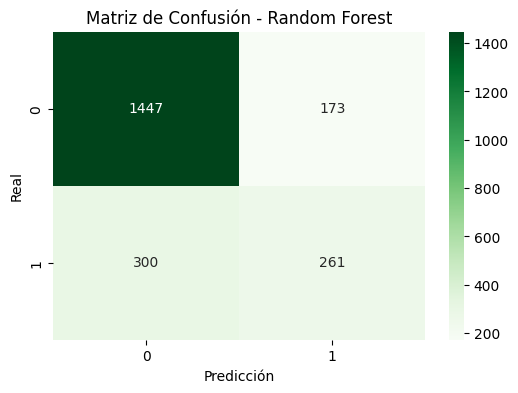

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Modelo 2: Random Forest
# ------------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("📊 Resultados - Random Forest")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


📊 Resultados - HistGradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1620
           1       0.61      0.48      0.54       561

    accuracy                           0.79      2181
   macro avg       0.72      0.69      0.70      2181
weighted avg       0.77      0.79      0.78      2181



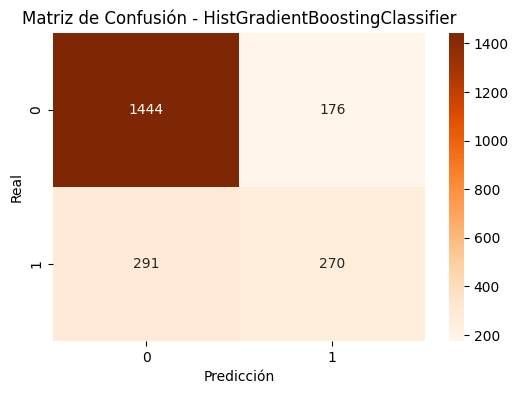

In [78]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Modelo 3: HistGradientBoostingClassifier
# ------------------------------
hgb = HistGradientBoostingClassifier(max_iter=200, random_state=42)
hgb.fit(X_train, y_train)
y_pred_hgb = hgb.predict(X_test)

print("📊 Resultados - HistGradientBoostingClassifier")
print(classification_report(y_test, y_pred_hgb))

cm_hgb = confusion_matrix(y_test, y_pred_hgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_hgb, annot=True, fmt="d", cmap="Oranges")
plt.title("Matriz de Confusión - HistGradientBoostingClassifier")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


C:\Users\Juan David\AppData\Local\Temp\ipykernel_19356\1224231652.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame({


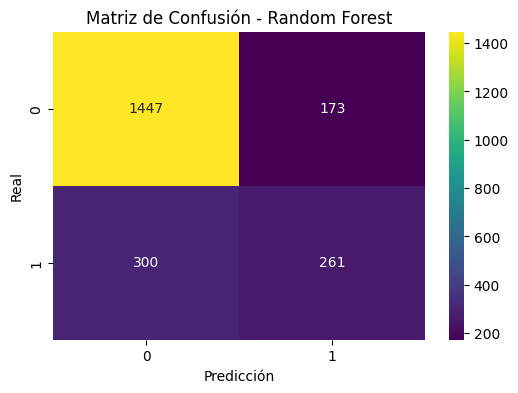

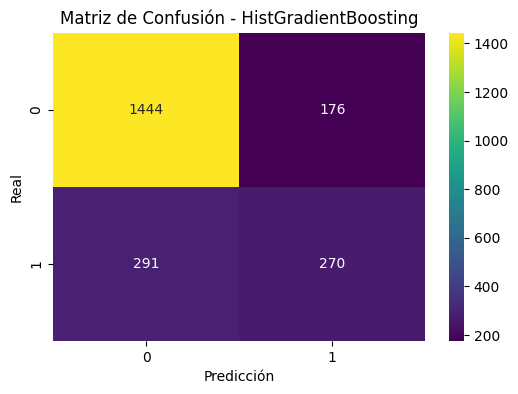

📊 Comparativa de desempeño de modelos


,Modelo,Exactitud,Precisión,Recall,F1-score
0,Random Forest,0.783127,0.769915,0.783127,0.773376
1,HistGradientBoosting,0.785878,0.773914,0.785878,0.777321


In [79]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Modelos
# ------------------------------
modelos = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(max_iter=200, random_state=42)
}

# DataFrame para guardar resultados
resultados = pd.DataFrame(columns=["Modelo", "Exactitud", "Precisión", "Recall", "F1-score"])

for nombre, modelo in modelos.items():
    # Entrenar
    modelo.fit(X_train, y_train)
    # Predecir
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # Guardar resultados
    resultados = pd.concat([resultados, pd.DataFrame({
        "Modelo": [nombre],
        "Exactitud": [exactitud],
        "Precisión": [precision],
        "Recall": [recall],
        "F1-score": [f1]
    })], ignore_index=True)
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Mostrar tabla comparativa
print("📊 Comparativa de desempeño de modelos")
display(resultados)


## Vamos a hacer un analisi de importancia de las variables

## 1️⃣ Random Forest

Random Forest permite medir la importancia de cada variable según cuánto reduce la impureza de los nodos en los árboles del bosque. Las variables que más reducen la impureza son las más relevantes para predecir la cancelación.


📊 Variables más importantes - Random Forest


,Variable,Importancia
7,account_Charges_Total,0.168428
3,customer_tenure,0.154255
6,account_Charges.Monthly,0.136615
8,Cuentas_Diarias,0.116571
13,internet_InternetService_Fiber optic,0.038357
30,account_PaymentMethod_Electronic check,0.034844
28,account_Contract_Two year,0.030895
10,customer_gender_Male,0.026489
5,account_PaperlessBilling,0.024196
1,customer_Partner,0.021929


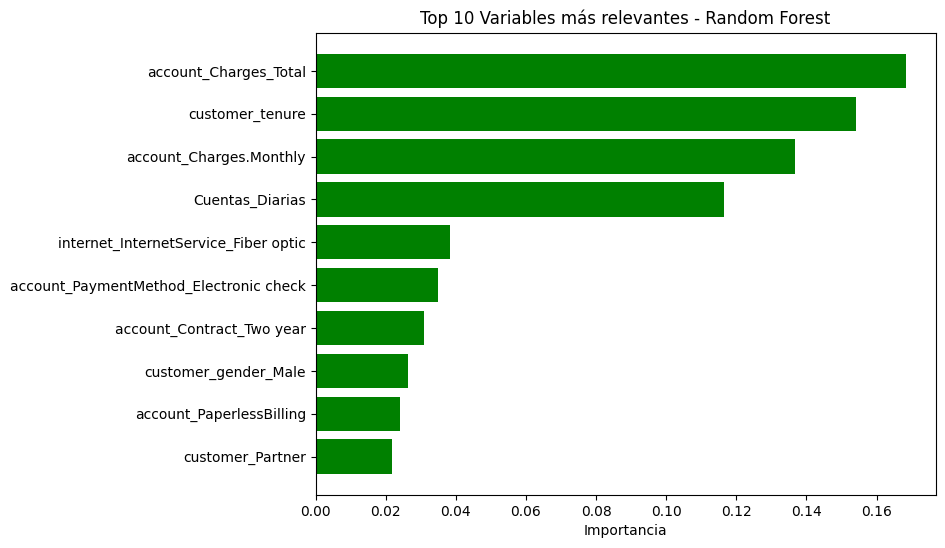

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraer importancia de variables
importancia_rf = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

# Mostrar top 10
print("📊 Variables más importantes - Random Forest")
display(importancia_rf.head(10))

# Visualización
plt.figure(figsize=(8,6))
plt.barh(importancia_rf["Variable"].head(10)[::-1], importancia_rf["Importancia"].head(10)[::-1], color="green")
plt.title("Top 10 Variables más relevantes - Random Forest")
plt.xlabel("Importancia")
plt.show()


Interpretación:

Las variables con mayor importancia son las que más contribuyen a decidir si un cliente cancelará o no.

Por ejemplo, si account_Charges_Total tiene un valor alto de importancia, indica que los cargos totales son determinantes para la predicción.

##  2️⃣HistGradientBoosting

Este modelo, al ser un boosting basado en árboles, también proporciona importancia de variables, calculada en función de cómo cada variable mejora la pérdida en las iteraciones.

📊 Variables más importantes - HistGradientBoosting (Permutation Importance)


,Variable,Importancia
3,customer_tenure,0.037873
13,internet_InternetService_Fiber optic,0.016094
7,account_Charges_Total,0.011738
27,account_Contract_One year,0.011692
28,account_Contract_Two year,0.010729
20,internet_DeviceProtection_Yes,0.004677
16,internet_OnlineSecurity_Yes,0.004493
8,Cuentas_Diarias,0.003668
22,internet_TechSupport_Yes,0.001926
26,internet_StreamingMovies_Yes,0.001834


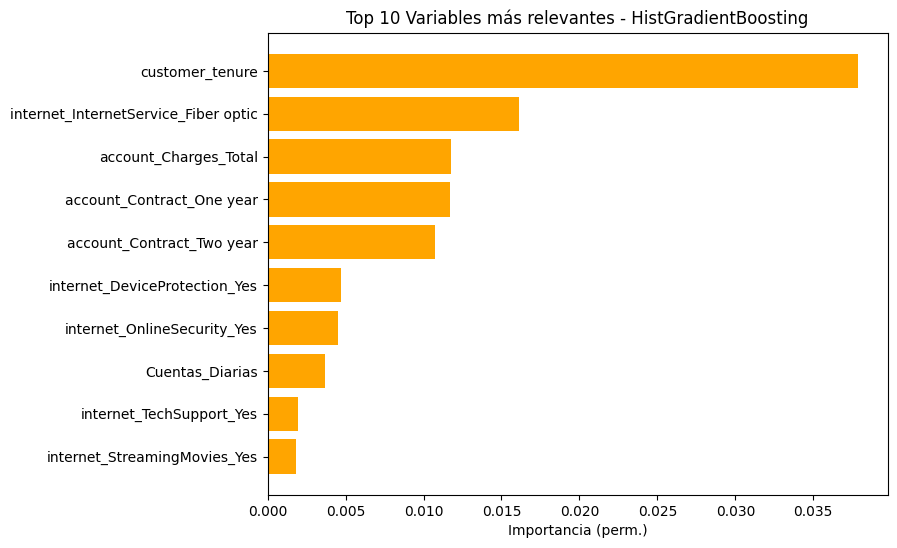

In [82]:
from sklearn.inspection import permutation_importance

# Calcular importancia por permutación
perm_importance = permutation_importance(hgb, X_test, y_test, n_repeats=10, random_state=42)

importancia_hgb = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": perm_importance.importances_mean
}).sort_values(by="Importancia", ascending=False)

# Mostrar top 10
print("📊 Variables más importantes - HistGradientBoosting (Permutation Importance)")
display(importancia_hgb.head(10))

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(importancia_hgb["Variable"].head(10)[::-1], importancia_hgb["Importancia"].head(10)[::-1], color="orange")
plt.title("Top 10 Variables más relevantes - HistGradientBoosting")
plt.xlabel("Importancia (perm.)")
plt.show()
